In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
bank_df=pd.read_csv("Banking Dataset.csv")

In [3]:
bank_df.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,41-45,843,9
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19
4,C10000,0,43,M,97100.48,SENP,3,41-45,397,8
5,C10001,0,30,M,160378.60,SAL,2,26-30,781,11
6,C10002,0,43,M,26275.55,PROF,23,41-45,354,12
7,C10003,0,53,M,33616.47,SAL,45,>50,239,5
8,C10004,0,45,M,1881.37,PROF,3,41-45,339,13
9,C10005,0,37,M,3274.37,PROF,33,36-40,535,9


In [4]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,20000.0,0.086650,0.281329,0.0,0.000,0.000,0.0000,1.00
Age,20000.0,38.396200,9.600179,21.0,30.000,38.000,47.0000,55.00
Balance,20000.0,146181.305626,169812.527447,0.0,23736.915,79755.745,217310.6325,1246966.77
No_OF_CR_TXNS,20000.0,16.653050,12.977704,0.0,7.000,13.000,22.0000,50.00
SCR,20000.0,557.136050,260.521453,100.0,333.000,560.000,784.0000,999.00
Holding_Period,20000.0,15.344100,8.952128,1.0,8.000,16.000,23.0000,31.00


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
Cust_ID           20000 non-null object
Target            20000 non-null int64
Age               20000 non-null int64
Gender            20000 non-null object
Balance           20000 non-null float64
Occupation        20000 non-null object
No_OF_CR_TXNS     20000 non-null int64
AGE_BKT           20000 non-null object
SCR               20000 non-null int64
Holding_Period    20000 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [6]:
for feature in bank_df.columns:
    if bank_df[feature].dtype == 'object':
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
Cust_ID           20000 non-null int16
Target            20000 non-null int64
Age               20000 non-null int64
Gender            20000 non-null int8
Balance           20000 non-null float64
Occupation        20000 non-null int8
No_OF_CR_TXNS     20000 non-null int64
AGE_BKT           20000 non-null int8
SCR               20000 non-null int64
Holding_Period    20000 non-null int64
dtypes: float64(1), int16(1), int64(5), int8(3)
memory usage: 1.0 MB


In [8]:
x = bank_df.drop(["Target","Cust_ID"],axis = 1)
y = bank_df.pop("Target")

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30,random_state=123)

In [ ]:
#rfc = RandomForestClassifier(n_estimators= 501,
#                             oob_score=True, 
#                             max_depth=10, 
#                             max_features=5,
#                             min_samples_leaf = 50,
#                             min_samples_split= 110,
#                            )

#rfc = rfc.fit(x_train, train_labels)
#rfc.oob_score_

In [10]:
#A dictionany with parameters for best values:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

In [11]:
rfcl = RandomForestClassifier()

In [12]:
grid_search = GridSearchCV(estimator=rfcl, param_grid = param_grid, cv= 3)

In [13]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7, 10], 'max_features': [4, 6], 'min_samples_leaf': [50, 100], 'min_samples_split': [150, 300], 'n_estimators': [301, 501]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [15]:
best_grid = grid_search.best_estimator_

In [16]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#Confusion matrix For training Data:
confusion_matrix(train_labels, ytrain_predict)

array([[12739,    28],
       [ 1164,    69]], dtype=int64)

In [19]:
#Confusion matrix For testing Data:
confusion_matrix(test_labels, ytest_predict)

array([[5487,   13],
       [ 482,   18]], dtype=int64)

In [20]:
#classification_report for training Data:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12767
           1       0.71      0.06      0.10      1233

   micro avg       0.91      0.91      0.91     14000
   macro avg       0.81      0.53      0.53     14000
weighted avg       0.90      0.91      0.88     14000



In [21]:
#classification_report for testing Data:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5500
           1       0.58      0.04      0.07       500

   micro avg       0.92      0.92      0.92      6000
   macro avg       0.75      0.52      0.51      6000
weighted avg       0.89      0.92      0.88      6000



In [25]:
probs_train = best_grid.predict_proba(x_train)
probs_train = probs_train[:,1]
probs_test = best_grid.predict_proba(x_test)
probs_test = probs_test[:,1]

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

In [27]:
# AUC Score & ROC Curve for training data:
auc_train = roc_auc_score(train_labels, probs_train)
auc_train

0.830117640960376

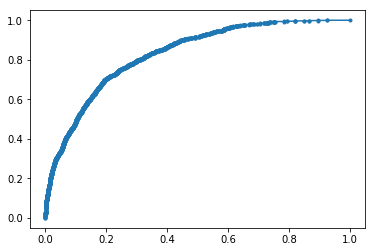

In [37]:
#ROC Curve for training data
fpr, tpr, thresholds = roc_curve(train_labels, probs_train)
plt.plot(fpr, tpr, marker='.')
plt.show()

In [28]:
# AUC Score & ROC Curve for testing data:
auc_test = roc_auc_score(test_labels, probs_test)
auc_test

0.7740232727272727

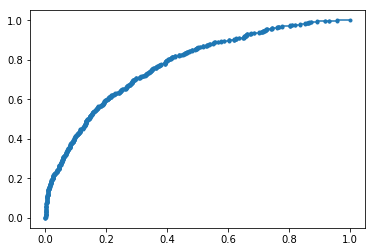

In [38]:
#ROC Curve for test data
fpr, tpr, thresholds = roc_curve(test_labels, probs_test)
plt.plot(fpr, tpr, marker='.')
plt.show()